# Chargement des données !

Dans notre projet **Classification des panneaux routiers**, nous avons choisi de classifier des images associées à 5 labels différents : **stop**, **crosswalk** , **speedlimit**, **trafficlight**, **no-entry**.



Nous avons réparti nos images dans 3 ensembles (et donc 3 dossiers): *train* (entre 142 et 156 images par classe), *validation* (31 image par classe) et *test* (31 image par classe). Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes.

Nous avons choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide, ce qui vous garantit une certaine simplicité. Je vous encourage à en faire de même.

In [32]:
!git clone https://github.com/Abdelmouhaimen/DL-TrafficSignClassification.git
path = "./DL-TrafficSignClassification/data/"

fatal: destination path 'DL-TrafficSignClassification' already exists and is not an empty directory.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels.

In [79]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
    y = np.squeeze(y)

    return x, y

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [34]:
labels = ['crosswalk', 'no-entry', 'speedlimit','stop','trafficlight']

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)




(742, 128, 128, 3) (742,)
(154, 128, 128, 3) (154,)
(155, 128, 128, 3) (155,)


In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true , y_pred ,figsize = (12,12) ):
  labels = ['crosswalk', 'no-entry', 'speedlimit','stop','trafficlight']
    # Calculer la matrice de confusion
  conf_matrix = confusion_matrix(y_true, y_pred)

  # Afficher la matrice de confusion sous forme de heatmap
  plt.figure(figsize=figsize)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Valeurs prédites')
  plt.ylabel('Valeurs réelles')
  plt.title('Matrice de confusion')
  plt.show()




Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

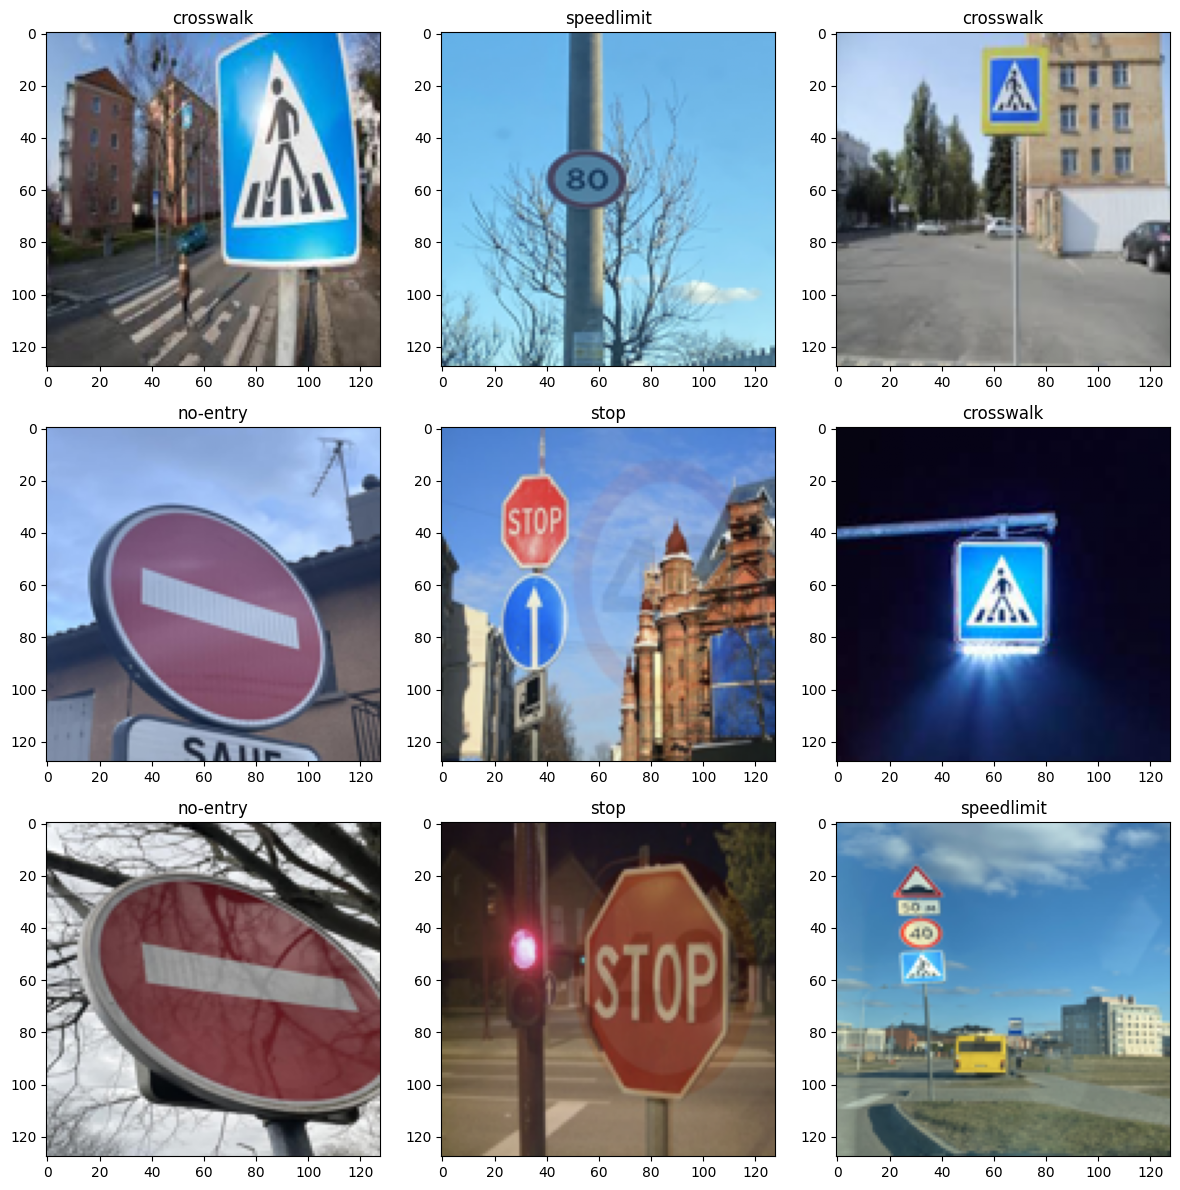

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(500)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Flatten,Input

In [41]:
'''
def creat_model (IMAGE_SIZE = 64) :

    model = Sequential()

    model.add(Input((IMAGE_SIZE,IMAGE_SIZE,3)))
    model.add(Conv2D(32,(3,3),padding ="valid" , activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(64,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(96,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(128,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Flatten())
    model.add(Dense(512,activation = "ReLU"))

    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
                  metrics=['sparse_categorical_accuracy' ])  # Métrique de précision

    return model
'''

def creat_model (IMAGE_SIZE = 64) :

    model = Sequential()

    model.add(Input((IMAGE_SIZE,IMAGE_SIZE,3)))
    model.add(Conv2D(32,(3,3),padding ="valid" , activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation = "ReLU"))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
                  metrics=['sparse_categorical_accuracy' ])  # Métrique de précision

    return model

In [42]:


def plot_training_analysis(history):
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


In [43]:

model = creat_model(128)
model.summary()
# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 30, 30, 64)       

In [44]:
history = model.fit(x_train,y_train,validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
24/24 [==============================] - 3s 38ms/step - loss: 1.6532 - sparse_categorical_accuracy: 0.2251 - val_loss: 1.5898 - val_sparse_categorical_accuracy: 0.2468
Epoch 2/30
24/24 [==============================] - 1s 26ms/step - loss: 1.4134 - sparse_categorical_accuracy: 0.3491 - val_loss: 1.4096 - val_sparse_categorical_accuracy: 0.4156
Epoch 3/30
24/24 [==============================] - 1s 27ms/step - loss: 1.2680 - sparse_categorical_accuracy: 0.4043 - val_loss: 1.2672 - val_sparse_categorical_accuracy: 0.4156
Epoch 4/30
24/24 [==============================] - 1s 26ms/step - loss: 1.2391 - sparse_categorical_accuracy: 0.4367 - val_loss: 1.2026 - val_sparse_categorical_accuracy: 0.4805
Epoch 5/30
24/24 [==============================] - 1s 25ms/step - loss: 1.1462 - sparse_categorical_accuracy: 0.4623 - val_loss: 1.1808 - val_sparse_categorical_accuracy: 0.5000
Epoch 6/30
24/24 [==============================] - 1s 26ms/step - loss: 1.0703 - sparse_categorical_accu

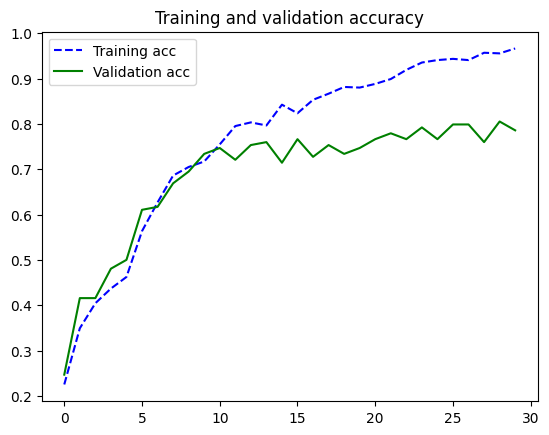

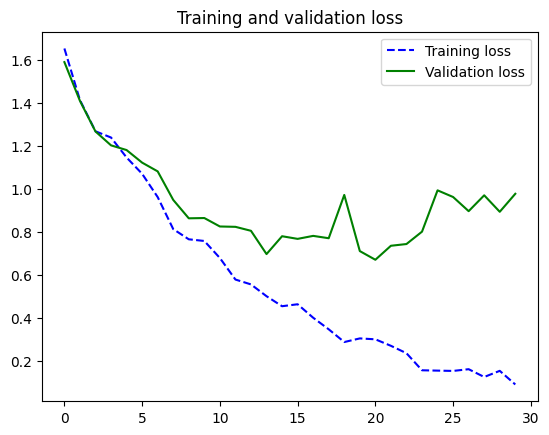

In [45]:
plot_training_analysis(history)

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.7304
Test accuracy  : 0.8387


5/5 [==============================] - 0s 8ms/step


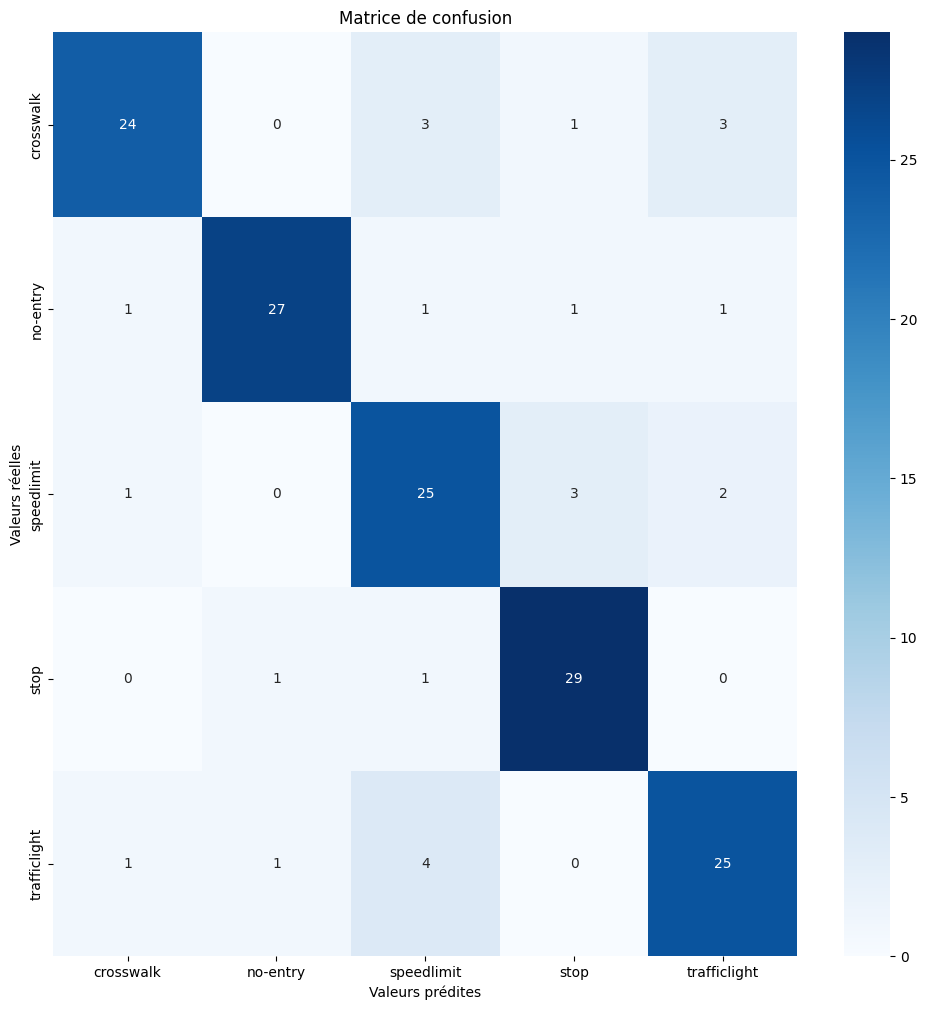

In [47]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [48]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83        31
         1.0       0.93      0.87      0.90        31
         2.0       0.74      0.81      0.77        31
         3.0       0.85      0.94      0.89        31
         4.0       0.81      0.81      0.81        31

    accuracy                           0.84       155
   macro avg       0.84      0.84      0.84       155
weighted avg       0.84      0.84      0.84       155



In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

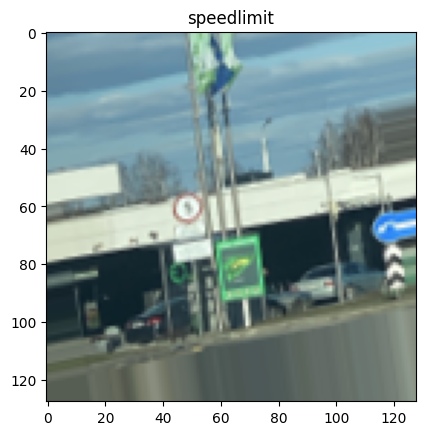

In [50]:
example_x, example_y = train_datagen.flow(x_train, y_train, batch_size=1).next()
example_x.shape
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(labels[int(example_y[i])])
    plt.show()


In [51]:
from tensorflow import keras

checkpoint_filepath = "/models/best-model.keras"

early_stopping_callback =keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
)

bestmodel_callback = keras.callbacks.ModelCheckpoint(
                                filepath=  checkpoint_filepath,
                                monitor='val_sparse_categorical_accuracy',
                                mode='max',
                                save_best_only=True,
                                save_weights_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=50,
                    callbacks = [bestmodel_callback])


# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

Epoch 1/50
75/75 [==============================] - 5s 58ms/step - loss: 1.2716 - sparse_categorical_accuracy: 0.5593 - val_loss: 0.7714 - val_sparse_categorical_accuracy: 0.6818
Epoch 2/50
75/75 [==============================] - 3s 41ms/step - loss: 0.9409 - sparse_categorical_accuracy: 0.6321 - val_loss: 0.7791 - val_sparse_categorical_accuracy: 0.7468
Epoch 3/50
75/75 [==============================] - 3s 40ms/step - loss: 0.8067 - sparse_categorical_accuracy: 0.6981 - val_loss: 0.6074 - val_sparse_categorical_accuracy: 0.7857
Epoch 4/50
75/75 [==============================] - 4s 54ms/step - loss: 0.7738 - sparse_categorical_accuracy: 0.7170 - val_loss: 0.6644 - val_sparse_categorical_accuracy: 0.7468
Epoch 5/50
75/75 [==============================] - 3s 41ms/step - loss: 0.8001 - sparse_categorical_accuracy: 0.7224 - val_loss: 0.7420 - val_sparse_categorical_accuracy: 0.7597
Epoch 6/50
75/75 [==============================] - 3s 40ms/step - loss: 0.7224 - sparse_categorical_accu

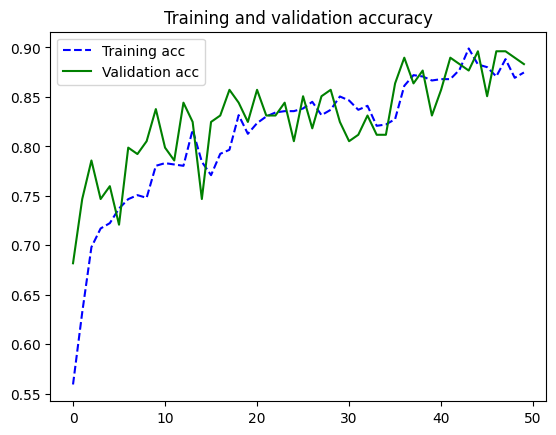

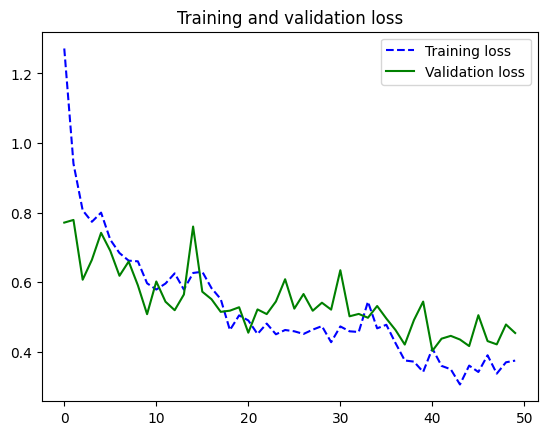

In [52]:
plot_training_analysis(history)

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.4533
Test accuracy  : 0.8903


5/5 [==============================] - 0s 6ms/step


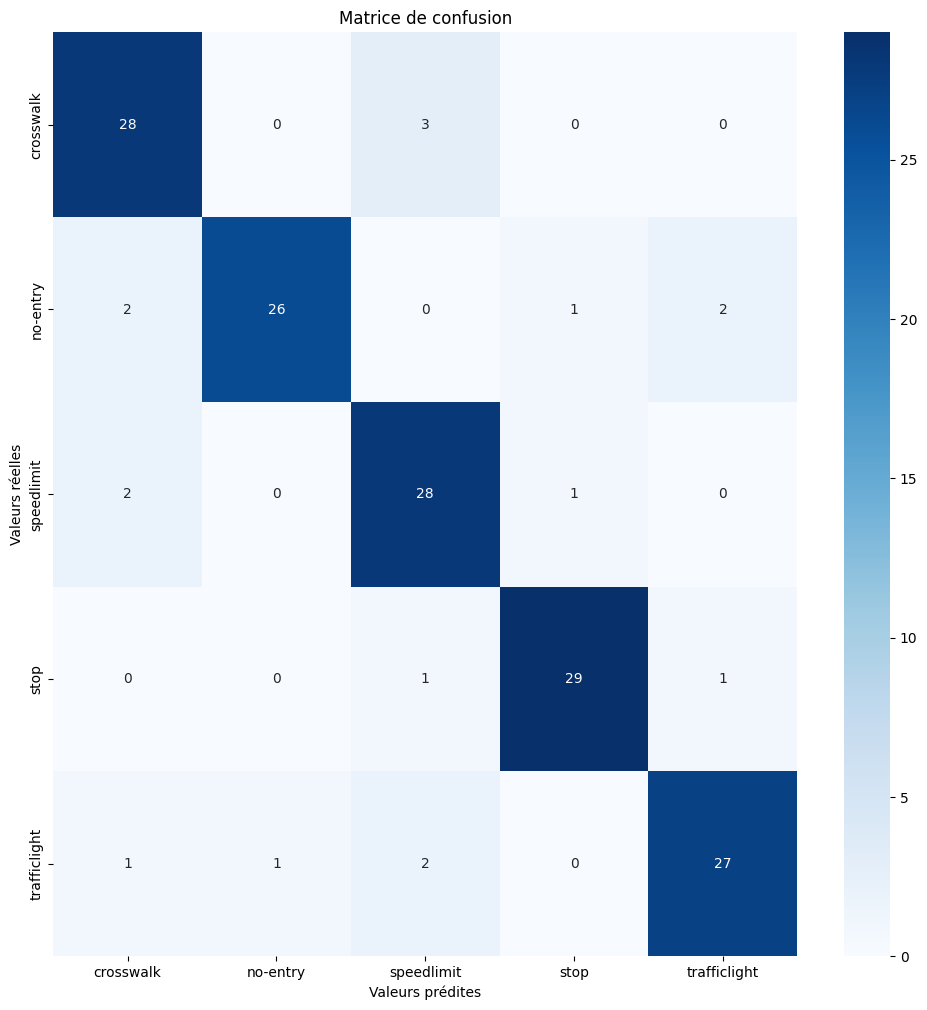

In [54]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [55]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88        31
         1.0       0.96      0.84      0.90        31
         2.0       0.82      0.90      0.86        31
         3.0       0.94      0.94      0.94        31
         4.0       0.90      0.87      0.89        31

    accuracy                           0.89       155
   macro avg       0.89      0.89      0.89       155
weighted avg       0.89      0.89      0.89       155



## Fine-tuning

In [56]:
from tensorflow.keras.applications import VGG16

IMAGE_SIZE = 128

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='ReLU'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
conv_base.trainable = True

bestmodel_callback = keras.callbacks.ModelCheckpoint(
                                filepath=  checkpoint_filepath,
                                monitor='val_sparse_categorical_accuracy',
                                mode='max',
                                save_best_only=True)

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
              metrics=[keras.metrics.SparseCategoricalAccuracy()])  # Métrique de précision


history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=10,
                    callbacks = [bestmodel_callback])

# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

Epoch 1/10
75/75 [==============================] - 11s 95ms/step - loss: 1.6880 - sparse_categorical_accuracy: 0.2844 - val_loss: 1.1181 - val_sparse_categorical_accuracy: 0.6558
Epoch 2/10
75/75 [==============================] - 6s 77ms/step - loss: 1.0546 - sparse_categorical_accuracy: 0.5970 - val_loss: 0.7397 - val_sparse_categorical_accuracy: 0.7403
Epoch 3/10
75/75 [==============================] - 7s 89ms/step - loss: 0.8199 - sparse_categorical_accuracy: 0.6927 - val_loss: 0.6476 - val_sparse_categorical_accuracy: 0.7792
Epoch 4/10
75/75 [==============================] - 6s 78ms/step - loss: 0.6349 - sparse_categorical_accuracy: 0.7749 - val_loss: 0.6244 - val_sparse_categorical_accuracy: 0.8182
Epoch 5/10
75/75 [==============================] - 6s 76ms/step - loss: 0.5545 - sparse_categorical_accuracy: 0.8127 - val_loss: 0.6584 - val_sparse_categorical_accuracy: 0.7922
Epoch 6/10
75/75 [==============================] - 6s 81ms/step - loss: 0.4643 - sparse_categorical_acc

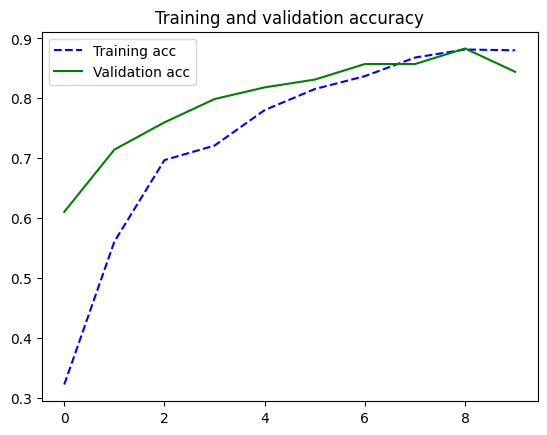

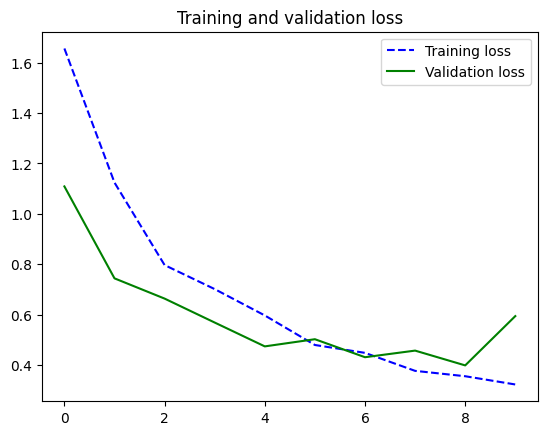

In [77]:
plot_training_analysis(history)

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.2373
Test accuracy  : 0.9161


5/5 [==============================] - 0s 52ms/step


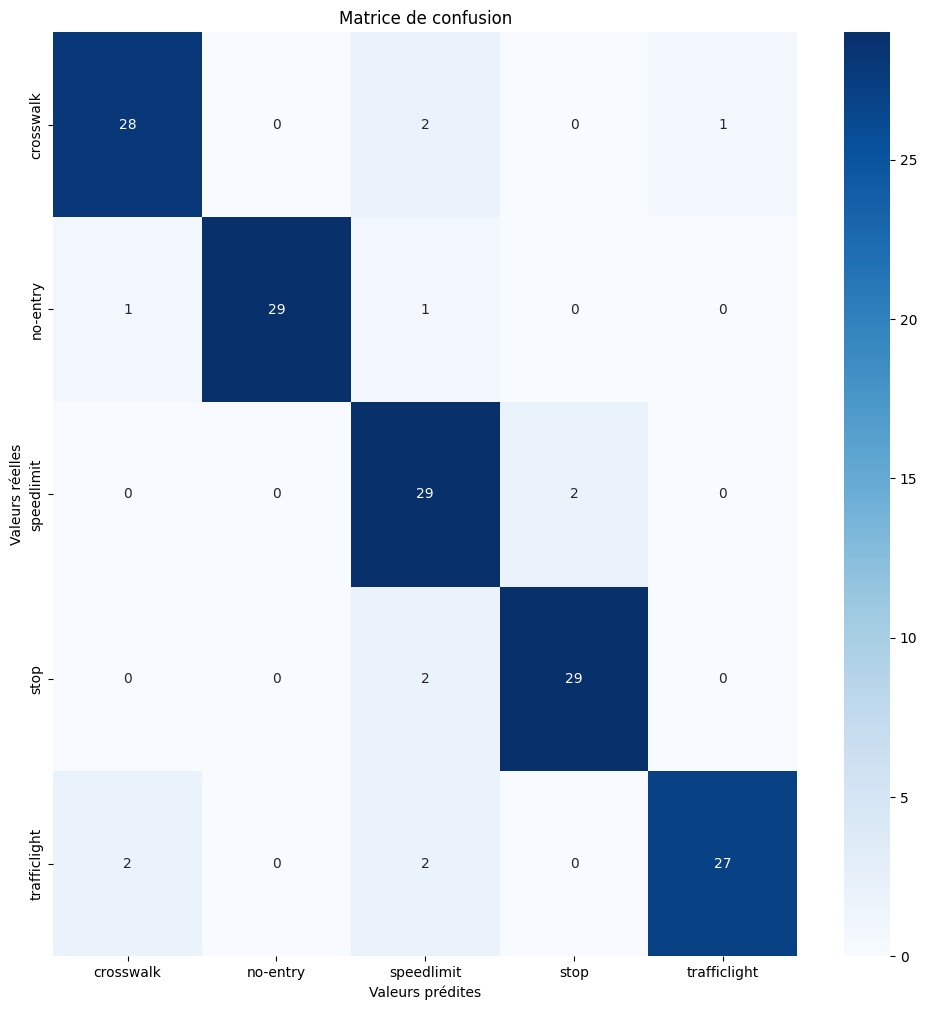

In [59]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [60]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        31
         1.0       1.00      0.94      0.97        31
         2.0       0.81      0.94      0.87        31
         3.0       0.94      0.94      0.94        31
         4.0       0.96      0.87      0.92        31

    accuracy                           0.92       155
   macro avg       0.92      0.92      0.92       155
weighted avg       0.92      0.92      0.92       155



# dataset cooking